<a href="https://colab.research.google.com/github/anacarolinaz/portfolio/blob/main/Launches_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The evolution of the space sector since 1957**
### Even after the cold war, do we still explore the space like before?

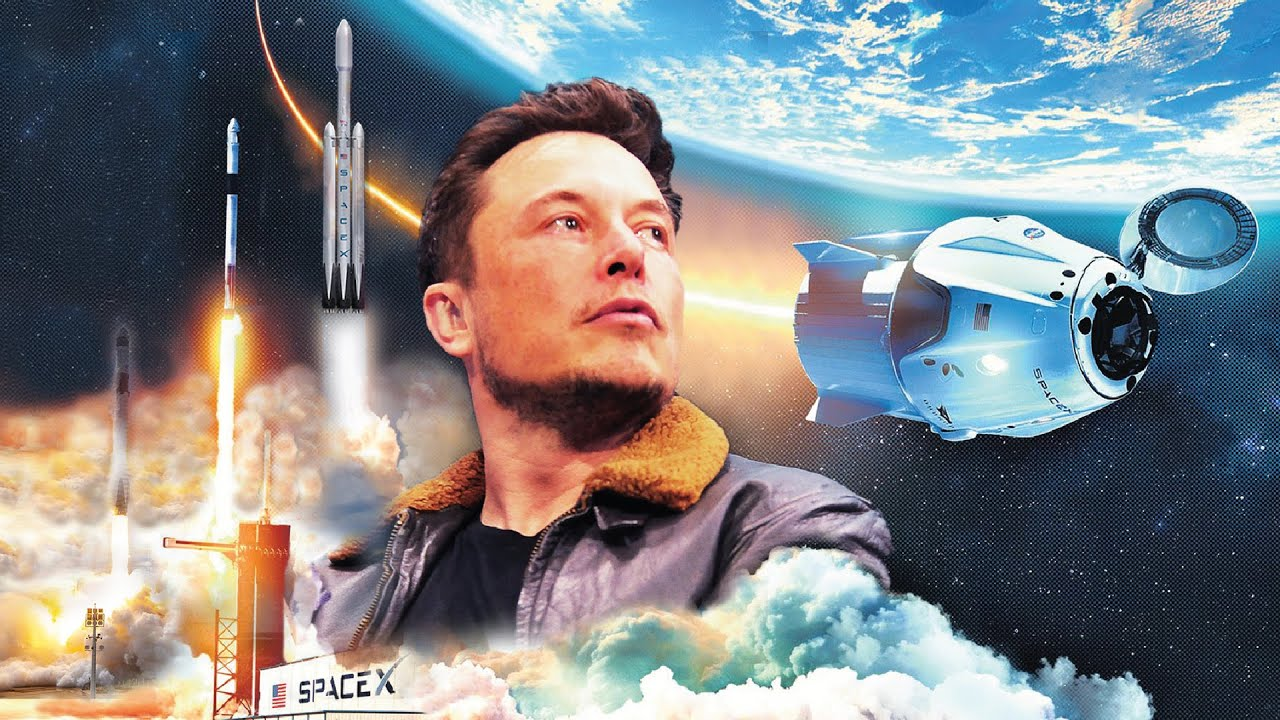

### Currently, **our launches are safer**, **our are capsules more compacts** and **our rockets are faster**. The space sector is perhaps the one that has attracted the most attention in recent years, but **how has this evolved since the first launches until today?**

### My **objective** in this **data analysis** will be, through data, to answer this question: **How the launch was grown from the first launch to today?**

### **Hope you enjoy.**

### **Installing libraries and importing the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
#Importation of the dataframe
space = pd.read_csv("/content/space-missions.csv")
#Show the first 5 lines 
space.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


You can see now how many columns it has, what information we can use and imagine what relationship there is between them.

---







### **Fixing some columns**

When this step is finished, we will be able to analyse these data and represent them in the best way possible. 

In [ ]:
space["Year"] = space["Datum"].map(lambda date : date.split(",")[-1]).map(lambda date : date.split(" ")[1])

space["Country"] = space["Location"].map(lambda loc : loc.split(",")[-1].strip())
space["Launcher"] = space["Location"].map(lambda loc : loc.split(",")[0].strip())
space["Site name"] = space["Location"].map(lambda loc : loc.split(",")[1].strip())

del space["Unnamed: 0.1"]
del space["Launcher"]
del space["Detail"]

space["Unnamed: 0"] = (space["Unnamed: 0"] + 1 - max(space["Unnamed: 0"]))*(-1)+2
space.rename(columns={" Rocket" : "Rocket price","Unnamed: 0" : "Launch Number"}, inplace = True)

space.head()

,Launch Number,Company Name,Location,Datum,Status Rocket,Rocket price,Status Mission,Year,Country,Site name
0,4324,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success,2020,USA,Kennedy Space Center
1,4323,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success,2020,China,Jiuquan Satellite Launch Center
2,4322,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success,2020,USA,Boca Chica
3,4321,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success,2020,Kazakhstan,Baikonur Cosmodrome
4,4320,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success,2020,USA,Cape Canaveral AFS


In [ ]:
space["Country"].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [ ]:
#Here we're changing some 'countries' that just were used to make the launches
space["Country"].replace('Yellow Sea', 'China',inplace = True)
space["Country"].replace('Shahrud Missile Test Site', 'Iran',inplace = True)
space["Country"].replace('Pacific Missile Range Facility', 'USA',inplace = True)
space["Country"].replace('Barents Sea', 'Russia',inplace = True)
space["Country"].replace('Pacific Ocean', 'USA',inplace = True)
space["Country"].replace('New Mexico', 'USA',inplace = True)
space["Country"].replace('Gran Canaria', 'Spain',inplace = True)

#Example: 'VKS RF', 'RVSN USSR', 'ROSCOSMOS' are all Russian Companies.
x = ["VKS RF","RVSN USSR","ROSCOSMOS"]
for c in x :
    space.loc[space['Company Name'] == c, "Country"] = "Russia"

In [ ]:
space.head()

,Company Name,Location,Datum,Status Rocket,Rocket,Status Mission,Country,Site name,Day,Month,Day Number,Hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.0,Success,USA,Kennedy Space Center,Fri,Aug,07,05:12
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success,China,Jiuquan Satellite Launch Center,Thu,Aug,06,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,NaN,Success,USA,Boca Chica,Tue,Aug,04,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.0,Success,Kazakhstan,Baikonur Cosmodrome,Thu,Jul,30,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.0,Success,USA,Cape Canaveral AFS,Thu,Jul,30,11:50


**This is how our dataset looks after some changes**, in each **code cell** has a mini **description of my actions** to organize the data. Take a look if you want to understand everything.

---



## **Finally: the analysis**

Right now we're going to catch some **informations** about the **data** and finally make  **graphical representations**.

In [ ]:
space.shape

(4324, 12)

Now the dataset is clean, it contains **12 columns and 4324 lines.**



---



In [ ]:
space.tail(1)

,Company Name,Location,Datum,Status Rocket,Rocket,Status Mission,Country,Site name,Day,Month,Day Number,Hour
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,StatusRetired,NaN,Success,Russia,Baikonur Cosmodrome,Fri,Oct,04,19:28


Here we can see that **the first launch was in "Oct 04th 1957 at 19:28:00 from the Baikonut Cosmodrome.**
It was organizated by the **USRR (Russia)** and **the mission was a success**



---



**Infos to keep in mind:**

*   Total of 4324 launches;
*   There are 56 companies;
*   16 Countries;
*   Russia seems to be the most represented in this dataset.




---



## **The purpose of this analysis**

I said in the introduction that my goal will be **answer to these subject**:

*   **How the launch was grown from the first launch to today?**

**So let's do it.**

---




# **How the launch was grown from the first launch to today?**

### **Evolution of Launches**



In [ ]:
fig = px.line(space, x='Year', y="Launch Number",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark",height = 600, width = 600)
fig.show()

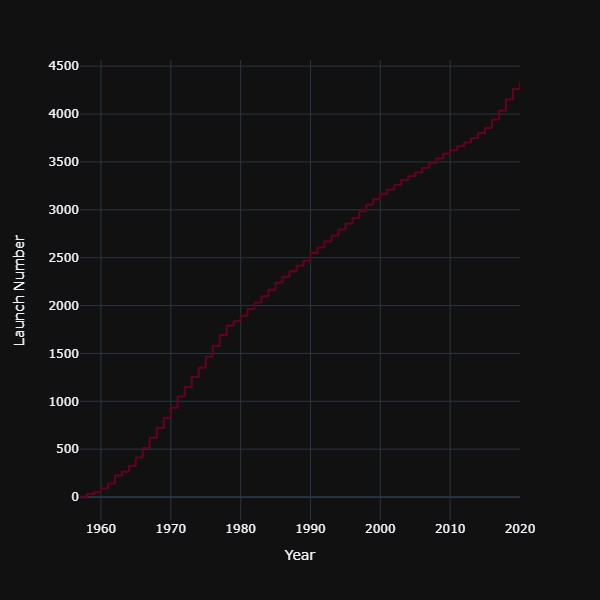

**The evolution is almost linear. This reflect the constant interest in space discovery. It also reflects the investment made in this sector over the years. But to see more cleary how the number of launches grown up, I will use a bar plot to compare each year.**

---



### **Launches per year**

In [ ]:
Count_Year = space["Year"].value_counts().reset_index().rename(columns={"index" : "Year", "Year" : "Count"}).sort_values("Year")
fig = px.bar(Count_Year, y='Count',  x='Year', text='Count', color = 'Count',color_continuous_scale= px.colors.sequential.Oranges, 
             template = "plotly_dark",height = 600, width = 700)
fig.show()

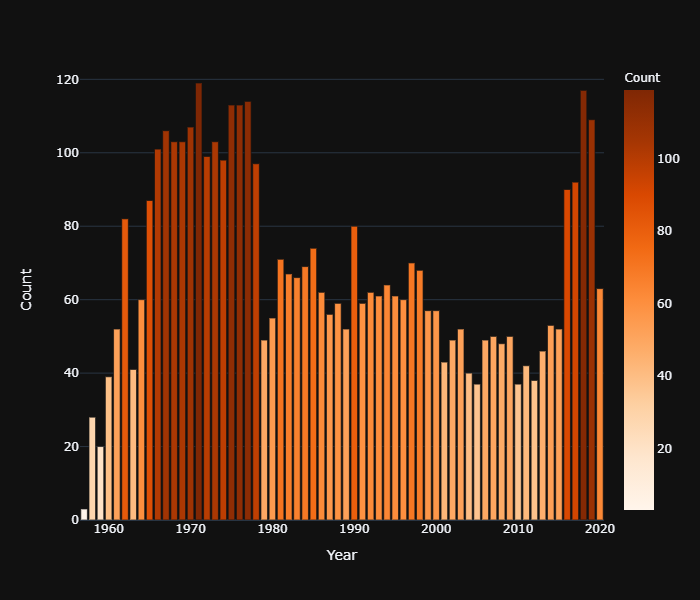

Now we can see more clearly the evolution now, and particulary the difference between the years.

**2 variations in the graph have to be mentioned:**


*   That grown up from 1957 to 1978 was the highest corresponding to the first part of Cold War
*   In the early 2000s there was a drastic drop compared to the Cold War and today 
*   We had a new grown since 2016!!!


---


### **Launches per year and by country**

In [ ]:
#Count_Year_country
Count_Year_country = space.groupby(["Year","Country"])["Launch Number"].count().reset_index()

fig = px.bar(Count_Year_country, y='Launch Number', x='Year',color="Country",
             color_discrete_sequence = px.colors.qualitative.Dark24,template = "plotly_dark"
             ,height = 600, width = 800)
fig.show()

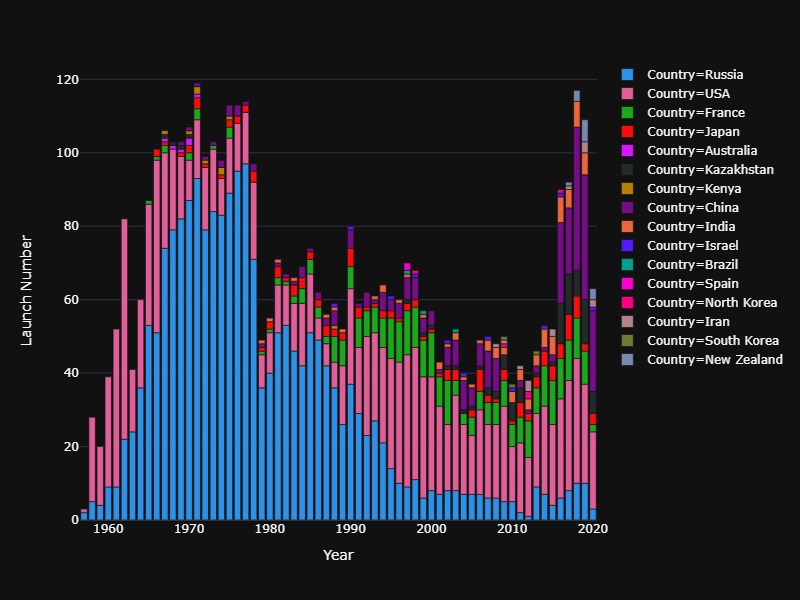

**USA and Russia dominated the sector until 1990. The Cold War showed to us the important of this two great countries in the space discovery.**

**You can take a look to France growing since 1989, which become a big nation in this sector too.**

---



In [ ]:
Tab = space.groupby(["Year","Status Mission"])["Launch Number"].count().reset_index()
fig = px.bar(Tab, y='Launch Number', x='Year',color="Status Mission",title='Success distribution by Year',
             color_continuous_scale = px.colors.sequential.Blues,template = "plotly_dark"
             ,height = 500, width = 800)
fig.show()

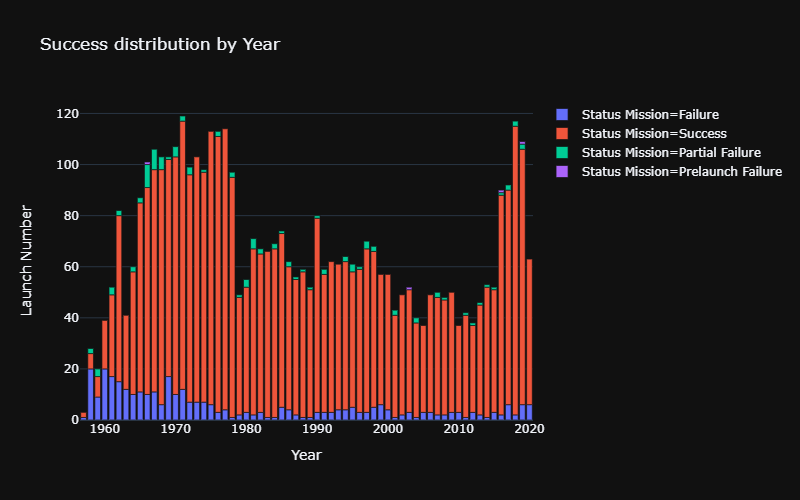

**The distribution seems to be coherent and proportional to the launches number. However, me see that Brazil has never succeeded in its launches attempts (3 failures including one pre-launch failure). Also, we can see that Kenya has never failed in its launches with a total of 9 ! it's only the beginning but this result is very promising.**

---



# **Conclusion**

At the beggining of the space exploration we can notice big numbers of launches per year, **this reflects how quickly we had scientific returns when we started investing in the space sector**.

Another factor that proves this, is the **"Launches per year and by country" chart**, look at **how many countries entered this division**, how in a few years **their investments surpass the two great powers that started it all**. **China** is a good example.

And to finish this analysis, all these **investments and committed professionals** are paying off, as **you can see in the third and last graph**, our **number of missions that failed** has **dramatically decreased** and this is the trend that will remain. The year **2020** was marked by a great market dispute between the great **private companies**, **SpaceX** and **Blue Origin**, with this dispute **to make space travel accessible** and to transform into a **business**, companies have to avoid mistakes as much as they can.

###**Yes, we are still exploring space, we do it better now than ever, and we will be incredibly better in the future.**

###**Because if it doesn't exist yet, everything is possible in it.**

---

